In [1]:
%pip install seaborn
%pip install matplotlib
%pip install plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns 

import plotly.express as px 


In [3]:
df = pd.read_excel("1730285881-Airbnb_Open_Data.xlsx")

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [6]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [7]:
df[df['neighbourhood group'] == 'brookin']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [8]:
df.drop_duplicates(inplace=True)
if df['price'].dtype == object:
	df['price'] = df['price'].str.replace('$', '', regex=False)
	df['price'] = df['price'].str.replace(',', '', regex=False)
if df['service fee'].dtype == object:
	df['service fee'] = df['service fee'].str.replace('$', '', regex=False)
	df['service fee'] = df['service fee'].str.replace(',', '', regex=False)
df.dropna(inplace=True)
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)
df.loc[df['neighbourhood group'] == 'brookin', 'neighbourhood group'] = 'Brooklyn'
df.drop(df[df['availability 365'] > 500].index, inplace=True)

In [9]:
import pandas as pd


file_path = '1730285881-Airbnb_Open_Data.xlsx'
xls = pd.ExcelFile(file_path)
sheet_name = xls.sheet_names[0]
df = pd.read_excel(file_path, sheet_name=sheet_name)

df.columns = [c.strip() for c in df.columns]


full_dupes_mask = df.duplicated(keep=False)
full_dupes = df[full_dupes_mask]


id_dupes = pd.DataFrame()
if 'id' in df.columns:
    id_dupe_mask = df.duplicated(subset=['id'], keep=False)
    id_dupes = df[id_dupe_mask].sort_values('id')


full_dupes_file = 'duplicates_full_rows.xlsx'
id_dupes_file = 'duplicates_by_id.xlsx'
with pd.ExcelWriter(full_dupes_file) as writer:
    if not full_dupes.empty:
        full_dupes.to_excel(writer, index=False, sheet_name='full_row_duplicates')
    else:
        pd.DataFrame({'note': ['No full-row duplicates found']}).to_excel(writer, index=False, sheet_name='full_row_duplicates')

with pd.ExcelWriter(id_dupes_file) as writer:
    if not id_dupes.empty:
        id_dupes.to_excel(writer, index=False, sheet_name='id_duplicates')
    else:
        pd.DataFrame({'note': ['No id duplicates found']}).to_excel(writer, index=False, sheet_name='id_duplicates')


print(df.head())
print(full_dupes.head())
print(id_dupes.head())
print(full_dupes.shape)
print(id_dupes.shape)
print('Saved duplicates to files: ' + full_dupes_file + ' and ' + id_dupes_file)

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United S

In [10]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [12]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


In [13]:
property_types = df['room type'].value_counts().to_frame(name='count')
property_types

,count
room type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116


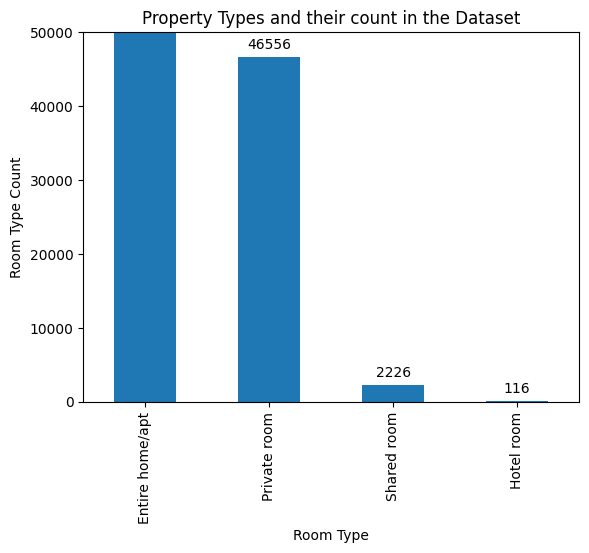

In [14]:
ax = property_types.plot(kind='bar', legend=False)
ax.bar_label(ax.containers[0], labels=property_types['count'], padding=4)

plt.ylim([0, 50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')
plt.show()

In [15]:
hood_group_counts = df['neighbourhood group'].value_counts().to_frame(name='count')
hood_group_counts

,count
neighbourhood group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1


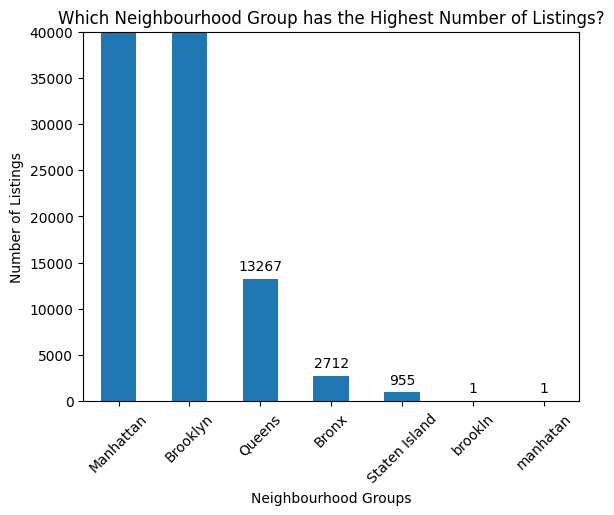

In [16]:

ax = hood_group_counts.plot(kind='bar', legend=False)

ax.bar_label(ax.containers[0], labels=hood_group_counts['count'], padding=4)

plt.ylim([0, 40000])
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.title('Which Neighbourhood Group has the Highest Number of Listings?')
plt.show()

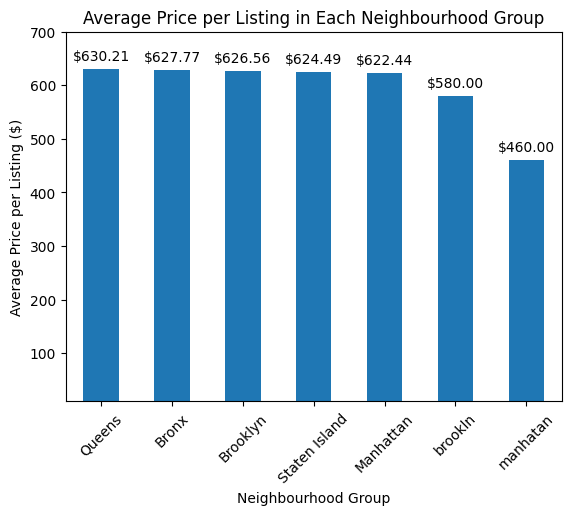

In [17]:
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False).to_frame()


ax = avg_price.plot(kind='bar', legend=False)
ax.bar_label(ax.containers[0], labels=[f"${v:,.2f}" for v in avg_price['price']], padding=4)

plt.ylim(10, 700)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price per Listing ($)")
plt.xticks(rotation=45)
plt.title("Average Price per Listing in Each Neighbourhood Group")
plt.show()

Text(0.5, 1.0, 'Average Price ($) for Properties in each Construction Year')

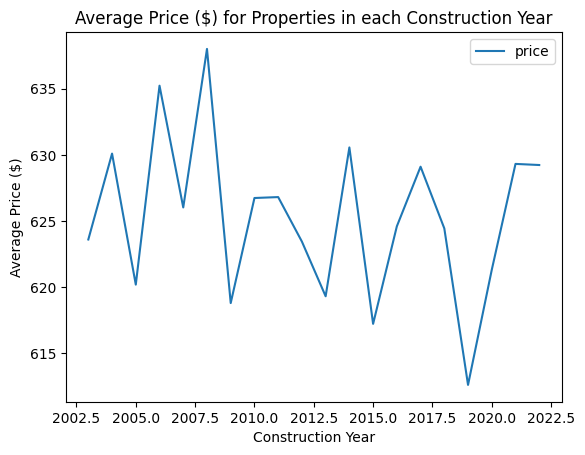

In [18]:
df.groupby('Construction year')['price'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')

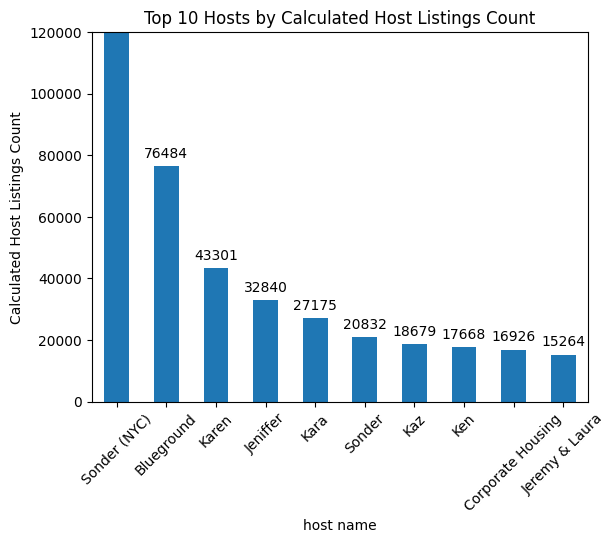

In [19]:
top_hosts = (
	df.groupby('host name')['calculated host listings count']
	.sum()
	.sort_values(ascending=False)
	.head(10)
	.to_frame()
)


ax = top_hosts.plot(kind='bar', legend=False)
ax.bar_label(ax.containers[0], labels=top_hosts['calculated host listings count'].astype(int), padding=4)

plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=45)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.show()

In [20]:
result = (
	df.groupby('host_identity_verified')['review rate number']
	.mean()
	.sort_values(ascending=False)
	.to_frame(name='mean_review_rate_number')
)
result

,mean_review_rate_number
host_identity_verified,
verified,3.286684
unconfirmed,3.271767


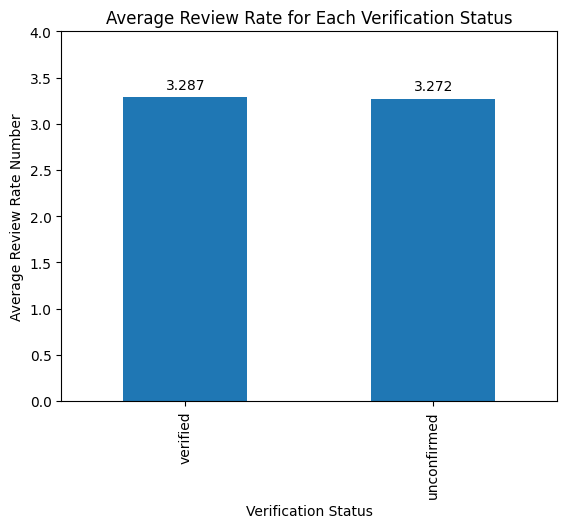

In [21]:
ax = result.plot(kind='bar', legend=False)
ax.bar_label(ax.containers[0], labels=[f"{v:.3f}" for v in result['mean_review_rate_number']], padding=4)

plt.ylim([0, 4])
plt.xlabel("Verification Status")
plt.ylabel("Average Review Rate Number")
plt.title("Average Review Rate for Each Verification Status")
plt.show()

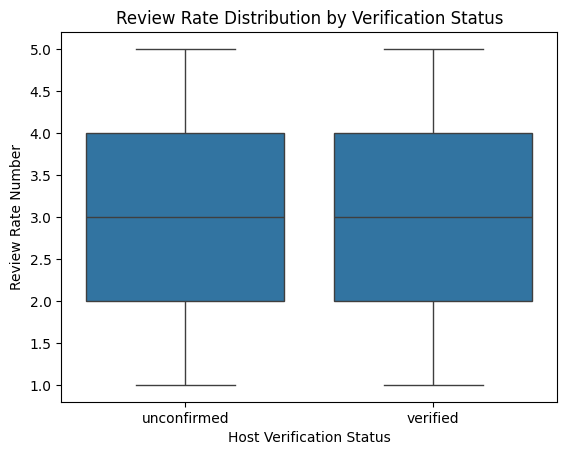

In [30]:


base_color = sns.color_palette()[0]

sns.boxplot(
    data=df,
    x="host_identity_verified",
    y="review rate number",   # <-- fixed name with spaces
    color=base_color
)

plt.xlabel("Host Verification Status")
plt.ylabel("Review Rate Number")
plt.title("Review Rate Distribution by Verification Status")
plt.show()


In [22]:
df['price'].corr(df['service fee'])

np.float64(0.9999908755543332)

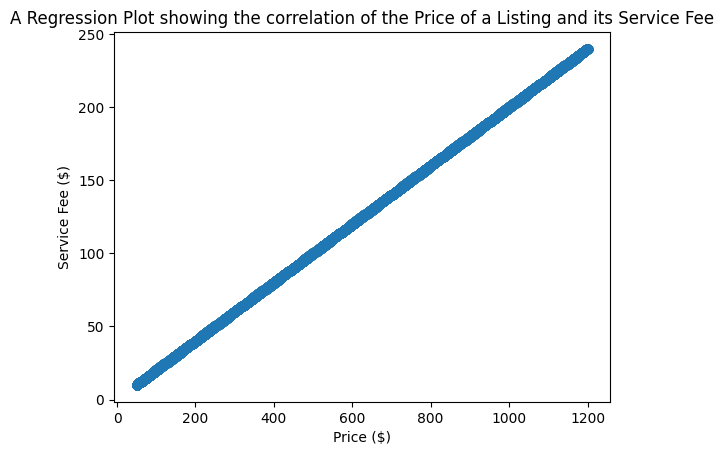

In [31]:
sns.regplot(x='price', y='service fee', data=df)
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A Regression Plot showing the correlation of the Price of a Listing and its Service Fee')
plt.show()

In [32]:
avg_review_rate = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame(name='avg_review_rate')
avg_review_rate

avg_review_rate
neighbourhood group room type                       
Bronx               Entire home/apt         3.346457
                    Private room            3.329706
                    Shared room             3.264957
Brooklyn            Entire home/apt         3.250378
                    Hotel room              3.750000
                    Private room            3.264465
                    Shared room             3.336983
Manhattan           Entire home/apt         3.275807
                    Hotel room              3.500000
                    Private room            3.277576
                    Shared room             3.257459
Queens              Entire home/apt         3.349154
                    Hotel room              3.750000
                    Private room            3.315585
                    Shared room             3.377778
Staten Island       Entire home/apt         3.329087
                    Private room            3.479482
                    Shared room             3.533333
brookln             Private room            4.000000
manhatan            Private room            3.000000

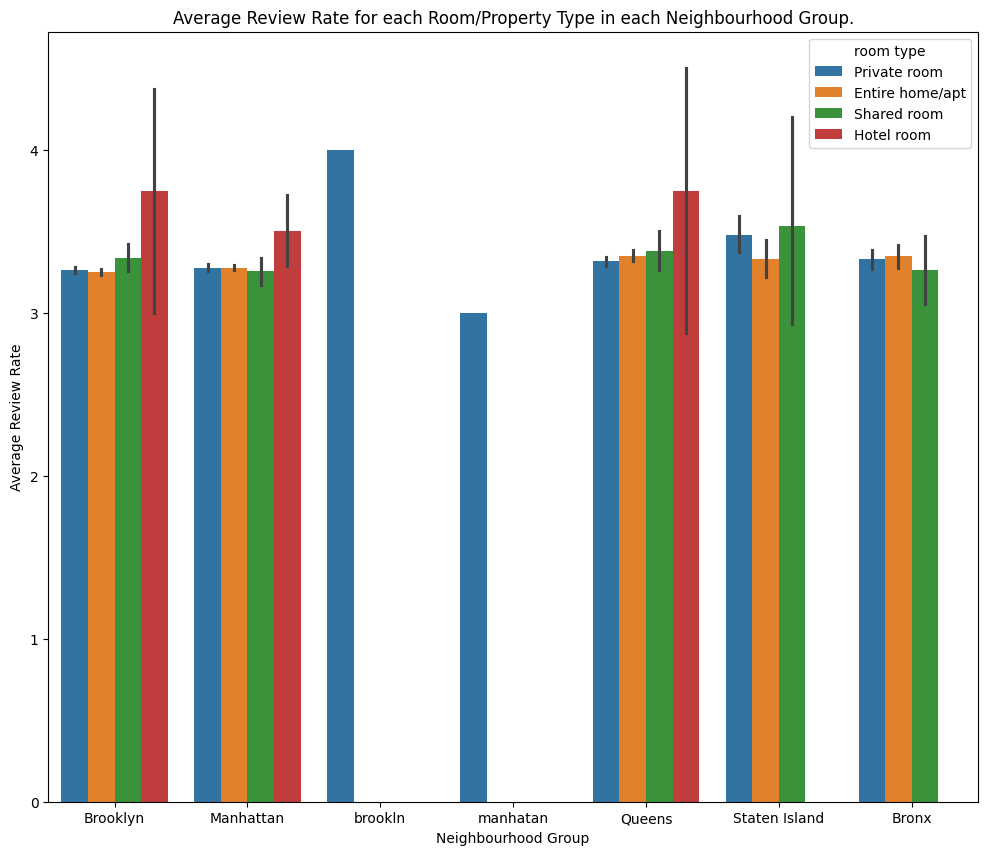

In [33]:
plt.figure(figsize = (12,10));
sns.barplot(data = df, x = "neighbourhood group", y = "review rate number", hue = "room type");
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

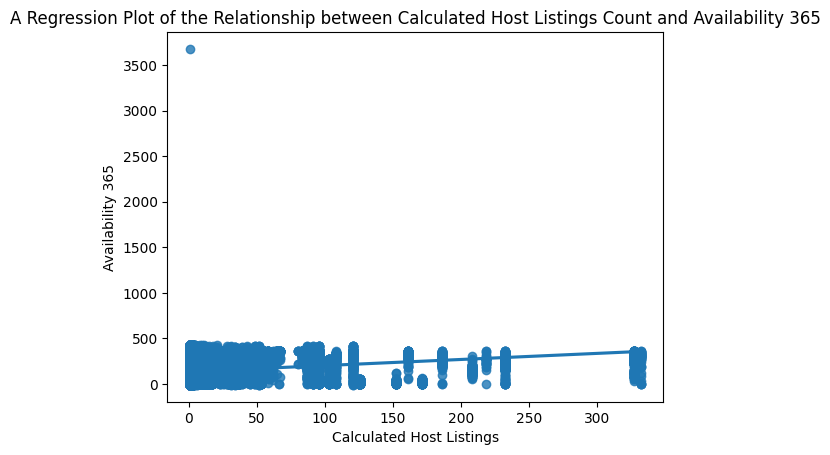

In [34]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [38]:
corr_value = float(df['calculated host listings count'].corr(df['availability 365']))
print(corr_value)


0.15919424228130613
